<a href="https://colab.research.google.com/github/aigerim1q/Assignment-BT2/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_LSTM_%D0%B4%D0%BB%D1%8F_%D0%BC%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%BD_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 92.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pymorphy3
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from collections import Counter

In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Dropout, LSTM, Bidirectional, SpatialDropout1D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Максимальное количество слов
num_words = 100000
# Максимальная длина комментария
max_comment_len = 500

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Просматриваем данные

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
!ls

sample_data  test.csv  train.csv


## Загружаем данные в память

Читаем данные из файла

In [ ]:
train

,Unnamed: 0,Zun,DEVOPS-инженер,HR-аналитика,HR-консалтинг,IoT-специалист,MVP-manager,Product-manager,R&D-manager,Аварийно-спасательная деятельность по обслуживанию опасных производственных объектов,...,"Техническое освидетельствование опасных технических устройств: лифтов, эскалаторов, траволаторов, подъемников для маломобильных лиц",Техническое сопровождение электроники,Технолог ИИ,Технолог квантового компьютинга,Тьютор цифрового развития (Talent manager),Управление архитектурой компьютерных систем,Управление и проектирование компьютерного аппаратного обеспечения и встроенных систем,Цифровой юрист,Этический консультант универсального ИИ,бизнес- анализ в информационно- коммуникационных технологиях
0,212,Кибербезопасность изучает защиту компьютерных ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,69,Анализировать структурированную и\nнеструктури...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,625,Разрабатывать прототип пользовательского интер...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,131,Запустить процедуру резервного\nкопирования. М...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44,Анализ результатов социологических исследовани...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,71,Анализировать текущую ситуацию в сравнении с п...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
601,106,Выбирать средства реализации требований к сист...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
602,270,Машинное и глубинное обучение (Machine Learnin...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
603,435,"Представлять варианты использования, описывающ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Выделяем данные для обучения

In [ ]:
def preprocess(text, stop_words, punctuation_marks, morph):
    tokens = word_tokenize(text.lower())
    preprocessed_text = []
    for token in tokens:
      if token not in punctuation_marks:
        lemma = morph.parse(token)[0].normal_form
        if lemma not in stop_words:
          preprocessed_text.append(lemma)
          if text == zamen:
            text.replace=' '
    return preprocessed_text

In [ ]:
punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...', '/', '@', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '"', 'лекция', '№', 'тема', 'неделя']
stop_words = stopwords.words("russian")
zamen = ['\t']
morph = pymorphy2.MorphAnalyzer()

In [ ]:
train['Zun'] = train.apply(lambda row: preprocess(row['Zun'], punctuation_marks, stop_words, morph), axis=1)

In [ ]:
comments = train['Zun']

In [ ]:
comments[:5]

0    [кибербезопасность, изучать, защита, компьютер...
1    [анализировать, структурировать, неструктуриро...
2    [разрабатывать, прототип, пользовательский, ин...
3    [запустить, процедура, резервный, копирование,...
4    [анализ, результат, социологический, исследова...
Name: Zun, dtype: object

Выделяем правильные ответы

In [ ]:
y_train = train[["DEVOPS-инженер","HR-аналитика","HR-консалтинг","IoT-специалист","MVP-manager","Product-manager","R&D-manager","Администрирование баз данных","Администрирование графических и операционных систем","Аналитик квантового компьютинга","Архитектор ИТ-экосистем","Архитектор периферийных вычислений","Архитекторы программного обеспечения","Бизнес аналитики и управление проектами ИТ","Блокчейн-технолог","Деятельность веб-порталов","Дизайнеры баз данных и администраторы","Инженер разработчик искусственных нейронных сетей","Инженер-технолог периферийных вычислений","Информационная безопасность","Инфраструктура компьютерных систем","Квантовый криптолог","Кибер-скиллингер-конструктор цифровых навык","Кибер-следователь","Киберадвокат","Киберпротектор","Киберпротектор универсального ИИ","Конструктор распределенных реестров","Консультант ИТ-этики","Обеспечение безопасности информационной инфраструктуры и ИТ","Обеспечение сопровождения программного обеспечения","Оператор АЦД","Оператор интеллектуальных киберфизических инфраструктур","Оператор квантового компьютинга","Проведение веб-мониторинга","Проектировщик искусственных нейронных сетей","Проектировщик разработчик инженер-технолог интеллектуальных киберфизических инфраструктур","Разработка IoT систем","Разработка высоконагруженных и real-time приложений","Разработка геоинформационных систем","Разработка графического и мультимедийного дизайна","Разработка приложений искусственного интеллекта","Разработка программного обеспечения","Разработка систем обработки и хранения больших данных","Разработки по облачным технологиям","Разработчик конструктор АЦД (агрегированных цифровых двойников)","Разработчик нейрокомпьютерных интерфейсов взаимодействия человека и ИИ","Разработчик универсального ИИ","Разработчик цифровых аватаров","Разработчик, Инженер-конструктор VR,AR,MR","Разработчики программного обеспечения и специалисты по тестированию, WEB и мультимедийных приложений","Системное и сетевое администрирование","Системный анализ в информационно-коммуникационных технологиях","Создание и управление информационными ресурсами","Создание и управление информационными технологиями","Сопровождение программного обеспечения","Специалист мониторинга мультиопыта (пользовательский опыт)","Специалисты-профессионалы по безопасности информационной инфраструктуры и ИТ","Тестирование Web и мультимедийных приложений","Тестирование мультимедийных приложений (включая компьютерные игры)","Тестирование программного обеспечения","Технолог ИИ","Технолог квантового компьютинга","Тьютор цифрового развития (Talent manager)","Управление архитектурой компьютерных систем","Управление и проектирование компьютерного аппаратного обеспечения и встроенных систем","Цифровой юрист","Этический консультант универсального ИИ","бизнес- анализ в информационно- коммуникационных технологиях"]]

In [ ]:
y_train

,DEVOPS-инженер,HR-аналитика,HR-консалтинг,IoT-специалист,MVP-manager,Product-manager,R&D-manager,Администрирование баз данных,Администрирование графических и операционных систем,Аналитик квантового компьютинга,...,Тестирование мультимедийных приложений (включая компьютерные игры),Тестирование программного обеспечения,Технолог ИИ,Технолог квантового компьютинга,Тьютор цифрового развития (Talent manager),Управление архитектурой компьютерных систем,Управление и проектирование компьютерного аппаратного обеспечения и встроенных систем,Цифровой юрист,Этический консультант универсального ИИ,бизнес- анализ в информационно- коммуникационных технологиях
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Токенизация текста

In [ ]:
comments[:5]

0    [data, science, изучать, метод, техника, анали...
1    [проектный, управление, разработка, программа,...
2    [устанавливать, настраивать, программный, обес...
3    [разрабатывать, концептуальный, документ, прое...
4    [применять, требование, техника, безопасность,...
Name: Zun, dtype: object

Создаем токенизатор Keras

In [ ]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на новостях

In [ ]:
tokenizer.fit_on_texts(comments)

Просматриваем словарь токенизатора

In [ ]:
tokenizer.word_index

{'система': 1,
 'метод': 2,
 'данные': 3,
 'программный': 4,
 'работа': 5,
 'анализ': 6,
 'организация': 7,
 'управление': 8,
 'основа': 9,
 'разработка': 10,
 'обеспечение': 11,
 'средство': 12,
 'область': 13,
 'принцип': 14,
 'требование': 15,
 'информация': 16,
 'процесс': 17,
 'технология': 18,
 'компьютерный': 19,
 'проведение': 20,
 'технический': 21,
 'программирование': 22,
 'безопасность': 23,
 'развитие': 24,
 'правило': 25,
 'оценка': 26,
 'изучать': 27,
 'язык': 28,
 'различный': 29,
 'информационный': 30,
 'ресурс': 31,
 'обучение': 32,
 'решение': 33,
 'программа': 34,
 'бд': 35,
 'работник': 36,
 'оборудование': 37,
 'основной': 38,
 'современный': 39,
 'также': 40,
 'нормативный': 41,
 'применять': 42,
 'техника': 43,
 'персонал': 44,
 'тестирование': 45,
 ';': 46,
 'база': 47,
 'использование': 48,
 'алгоритм': 49,
 'документация': 50,
 'результат': 51,
 'знание': 52,
 'использовать': 53,
 'документ': 54,
 'проводить': 55,
 'проектирование': 56,
 'создание': 57,
 'раз

Преобразуем комментарии в числовое представление

In [ ]:
sequences = tokenizer.texts_to_sequences(comments)

Просматриваем новости в числовом представлении

In [ ]:
index = 1
print(comments[index])
print(sequences[index])

['проектный', 'управление', 'разработка', 'программа', 'мероприятие', 'совместно', 'руководитель', 'подразделение', 'другой', 'заинтересованный', 'сторона', 'планирование', 'расчёт', 'организация', 'координация', 'мероприятие', 'совместно', 'руководитель', 'другой', 'направление', 'поиск', 'сбор', 'информации/дать', 'интервьюирование', 'анкетирование', 'групповой', 'дискуссия', 'неформальный', 'общение', 'сопоставление', 'факт', 'наблюдение', 'консультирование', 'руководство', 'коллектив', 'вопрос', 'улучшение', 'трудовой', 'отношение', 'работа', 'электронный', 'почта', 'интернет-', 'ресурс', 'сетевой', 'технология', 'законодательный', 'нормативный', 'правовой', 'акт', 'методический', 'материал', 'вопрос', 'управление', 'персонал', 'трудовой', 'законодательство', 'анализ', 'бизнес', 'цель', 'организация', 'стратегия', 'внешний', 'среда', 'система', 'метод', 'форма', 'материальный', 'нематериальный', 'стимулирование', 'труд', 'персонал', 'основа', 'экономика', 'организация', 'труд', 'уп

In [ ]:
tokenizer.word_index['данные']

3

Ограничиваем длину отзывов

In [ ]:
x_train = pad_sequences(sequences, maxlen=max_comment_len)

In [ ]:
x_train[:5]

array([[   0,    0,    0, ...,   69,    6,    3],
       [   0,    0,    0, ..., 2513,  787,   36],
       [   0,    0,    0, ...,   30,   19,   18],
       [   0,    0,    0, ...,   15,  173,   78],
       [   0,    0,    0, ...,   23,  108,  700]], dtype=int32)

## Cеть LSTM

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 128, input_length=max_comment_len))
model_lstm.add(SpatialDropout1D(0.5))
model_lstm.add(LSTM(40, return_sequences=True))
model_lstm.add(LSTM(40))
model_lstm.add(Dense(69, activation='sigmoid'))

In [ ]:
model_lstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC'])

In [ ]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          12800000  
                                                                 
 spatial_dropout1d_1 (Spati  (None, 500, 128)          0         
 alDropout1D)                                                    
                                                                 
 lstm_2 (LSTM)               (None, 500, 40)           27040     
                                                                 
 lstm_3 (LSTM)               (None, 40)                12960     
                                                                 
 dense_1 (Dense)             (None, 69)                2829      
                                                                 
Total params: 12842829 (48.99 MB)
Trainable params: 12842829 (48.99 MB)
Non-trainable params: 0 (0.00 Byte)
____________

Создаем callback для сохранения нейронной сети на каждой эпохе, если качество работы на проверочном наборе данных улучшилось. Сеть сохраняется в файл `best_model.h5`

In [ ]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history_lstm = model_lstm.fit(x_train,
                              y_train,
                              epochs=5,
                              batch_size=512,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/5
2/2 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.0100 - auc: 0.4972
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model_lstm.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 9s 2s/step - loss: 0.6929 - accuracy: 0.0100 - auc: 0.4972 - val_loss: 0.6909 - val_accuracy: 0.0000e+00 - val_auc: 0.4795
Epoch 2/5
2/2 [==============================] - ETA: 0s - loss: 0.6904 - accuracy: 0.0043 - auc: 0.4712
Epoch 2: val_accuracy did not improve from 0.00000
2/2 [==============================] - 1s 304ms/step - loss: 0.6904 - accuracy: 0.0043 - auc: 0.4712 - val_loss: 0.6878 - val_accuracy: 0.0000e+00 - val_auc: 0.4583
Epoch 3/5
2/2 [==============================] - ETA: 0s - loss: 0.6871 - accuracy: 0.0086 - auc: 0.4542
Epoch 3: val_accuracy did not improve from 0.00000
2/2 [==============================] - 0s 294ms/step - loss: 0.6871 - accuracy: 0.0086 - auc: 0.4542 - val_loss: 0.6832 - val_accuracy: 0.0000e+00 - val_auc: 0.4472
Epoch 4/5
2/2 [==============================] - ETA: 0s - loss: 0.6818 - accuracy: 0.0071 - auc: 0.4472
Epoch 4: val_accuracy improved from 0.00000 to 0.01143, saving model to best_model_lstm.h5


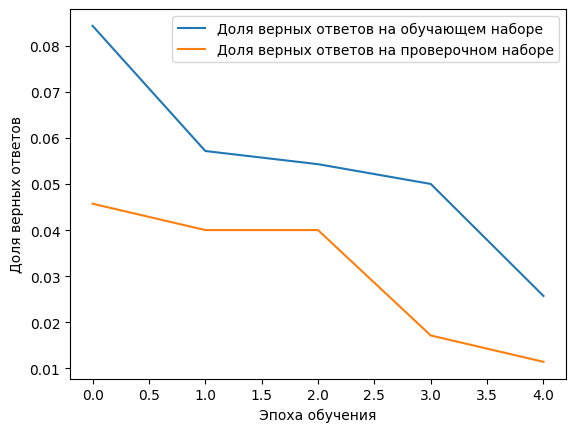

In [ ]:
plt.plot(history_lstm.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


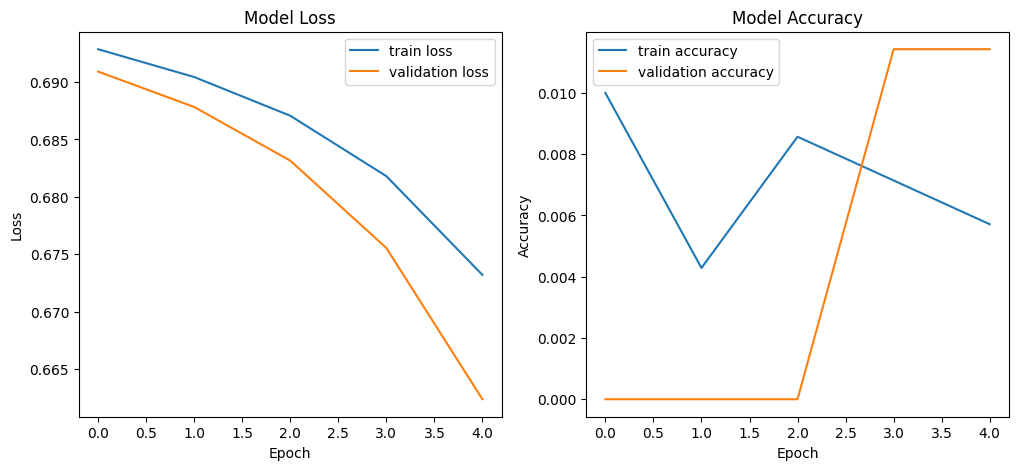

In [ ]:
# Графики потерь
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='train loss')
plt.plot(history_lstm.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Графики точности
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='train accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## Загружаем набор данных для тестирования

In [ ]:
test_comments = pd.read_csv(tes)

In [ ]:
test_comments[:10]

,Unnamed: 0,Zun,DEVOPS-инженер,HR-аналитика,HR-консалтинг,IoT-специалист,MVP-manager,Product-manager,R&D-manager
0,1001,Умеет разрабатывать вместе с художниками прост...,0,0,0,0,0,0,0
1,192,Выбирать средства реализации требований к сист...,0,0,0,0,0,0,0
2,361,Конструирование виртуальных моделей изучает пр...,0,0,0,0,0,0,0
3,814,Работать с различными программными продуктами ...,0,0,0,0,0,0,0
4,931,Системное и сетевое администрирование изучает ...,0,0,0,0,0,0,0
5,289,Использовать и применять показатель статистиче...,0,0,0,0,0,0,0
6,1063,"Фиксировать требования и потребности клиентов,...",0,0,0,0,0,0,0
7,918,Руководить работой структурного подразделения ...,0,0,0,0,0,0,0
8,694,Проводить анализ функциональных требований к а...,0,0,0,0,0,0,0
9,992,Умеет анализировать произведение искусства в к...,0,0,0,0,0,0,0


In [ ]:
test_labels = pd.read_csv(tes)

In [ ]:
test_labels[:10]

,Unnamed: 0,Zun,DEVOPS-инженер,HR-аналитика,HR-консалтинг,IoT-специалист,MVP-manager,Product-manager,R&D-manager
0,1001,Умеет разрабатывать вместе с художниками прост...,0,0,0,0,0,0,0
1,192,Выбирать средства реализации требований к сист...,0,0,0,0,0,0,0
2,361,Конструирование виртуальных моделей изучает пр...,0,0,0,0,0,0,0
3,814,Работать с различными программными продуктами ...,0,0,0,0,0,0,0
4,931,Системное и сетевое администрирование изучает ...,0,0,0,0,0,0,0
5,289,Использовать и применять показатель статистиче...,0,0,0,0,0,0,0
6,1063,"Фиксировать требования и потребности клиентов,...",0,0,0,0,0,0,0
7,918,Руководить работой структурного подразделения ...,0,0,0,0,0,0,0
8,694,Проводить анализ функциональных требований к а...,0,0,0,0,0,0,0
9,992,Умеет анализировать произведение искусства в к...,0,0,0,0,0,0,0


In [ ]:
test_full = pd.merge(test_comments, test_labels, on='Zun')

In [ ]:
test_full

,Unnamed: 0_x,Zun,DEVOPS-инженер_x,HR-аналитика_x,HR-консалтинг_x,IoT-специалист_x,MVP-manager_x,Product-manager_x,R&D-manager_x,Unnamed: 0_y,DEVOPS-инженер_y,HR-аналитика_y,HR-консалтинг_y,IoT-специалист_y,MVP-manager_y,Product-manager_y,R&D-manager_y
0,1001,Умеет разрабатывать вместе с художниками прост...,0,0,0,0,0,0,0,1001,0,0,0,0,0,0,0
1,192,Выбирать средства реализации требований к сист...,0,0,0,0,0,0,0,192,0,0,0,0,0,0,0
2,361,Конструирование виртуальных моделей изучает пр...,0,0,0,0,0,0,0,361,0,0,0,0,0,0,0
3,814,Работать с различными программными продуктами ...,0,0,0,0,0,0,0,814,0,0,0,0,0,0,0
4,931,Системное и сетевое администрирование изучает ...,0,0,0,0,0,0,0,931,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1026,Умеет формировать постановочную группу из твор...,0,0,0,0,0,0,0,1026,0,0,0,0,0,0,0
84,507,Организация работы по управлению расстановкой ...,0,0,1,0,0,0,0,507,0,0,1,0,0,0,0
85,334,"Компьютерные науки изучают алгоритмы, структур...",1,0,0,1,1,0,0,334,1,0,0,1,1,0,0
86,280,Использовать возможности техники словесного де...,0,0,0,0,0,0,0,280,0,0,0,0,0,0,0


In [ ]:
test = test_full[test_full['DEVOPS-инженер_x']!=-1]

In [ ]:
test

,Unnamed: 0_x,Zun,DEVOPS-инженер_x,HR-аналитика_x,HR-консалтинг_x,IoT-специалист_x,MVP-manager_x,Product-manager_x,R&D-manager_x,АРТИСТ ДРАМАТИЧЕСКОГО ТЕАТРА И КИНО_x,...,Управление корпоративной культурой_y,ХУДОЖНИК-ЖИВОПИСЕЦ (СТАНКОВИСТ)_y,ХУДОЖНИК-МОНУМЕНТАЛИСТ_y,ХУДОЖНИК-СКУЛЬПТОР_y,Цифровой юрист_y,Частная охранная деятельность_y,"Экспертиза промышленной безопасности для объектов в нефтехимической и нефтеперерабатывающих отраслях, нефтебаз и автозаправочных станций_y",Энергоаудит_y,Этический консультант универсального ИИ_y,бизнес- анализ в информационно- коммуникационных технологиях_y
0,482,"Определять объемы, масштабы аудита. Определять...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,139,Владеет различными способами репетиционной раб...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,88,Анализировать принципы работы и условий эксплу...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,939,Согласовывать исходные «живые» действия с объе...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,732,Проводить сценические репетиции в выгородках. ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,708,Проводить мониторинг веб-карт для добавления н...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,331,Комплексно применять на репетиции профессионал...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
216,361,Конструирование виртуальных моделей изучает пр...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217,814,Работать с различными программными продуктами ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Преобразуем комментарии в числовое представление

Обратите внимание, что нужно использовать токенизатор, обученный на наборе данных train.

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test['Zun'])

In [ ]:
x_test = pad_sequences(test_sequences, maxlen=max_comment_len)

In [ ]:
x_test[:5]

array([[   0,    0,    0, ...,  153,   58, 2352],
       [   0,    0,    0, ...,  102,   95,  124],
       [   0,    0,    0, ..., 1365,   40,   10],
       [   0,    0,    0, ...,  633,    1,  143],
       [   0,    0,    0, ...,    8,    8,  174]], dtype=int32)

Правильные ответы

In [ ]:
y_test = test[['DEVOPS-инженер_x', 'HR-аналитика_x', 'HR-консалтинг_x', 'IoT-специалист_x', 'MVP-manager_x', 'Product-manager_x', 'R&D-manager_x']]

In [ ]:
y_test[:10]

,DEVOPS-инженер_x,HR-аналитика_x,HR-консалтинг_x,IoT-специалист_x,MVP-manager_x,Product-manager_x,R&D-manager_x
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0


## Оцениваем качество работы сети на тестовом наборе данных

In [ ]:
model_lstm.load_weights(model_lstm_save_path)

In [ ]:
model_lstm.evaluate(x_test, y_test, verbose=1)

3/3 [==============================] - 0s 26ms/step - loss: 0.6839 - accuracy: 0.0341 - auc: 0.5145


[0.6838880181312561, 0.034090910106897354, 0.5145339965820312]

## Пробуем классифицировать комментарии

In [ ]:
  comment = "Применять специальные навыки для поддержки поиска и устранении неисправностей при аварийных ситуациях. Исправлять несложные ошибки при работе в графической системе (приложения + оборудования). Подбирать системные и периферийные устройства к требуемым графическим приложениям. Системы конфигурирования графических систем. Программные средства для проведения диагностики и выявления неисправности. Электротехника и построения структурированных кабельных систем передачи данных. Способы и средства защиты информации, включая администрирование устройств для ГС."

In [ ]:
sequence = tokenizer.texts_to_sequences([comment])

In [ ]:
sequence

[[42, 3888, 1059, 3891, 174, 350, 1908]]

In [ ]:
data = pad_sequences(sequence, maxlen=max_comment_len)

In [ ]:
data

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
result = model_lstm.predict(data)

1/1 [==============================] - 1s 1s/step


In [ ]:
result

array([[0.49166816, 0.49405068, 0.49019253, 0.49896836, 0.5004854 ,
        0.4946937 , 0.4953713 ]], dtype=float32)